In [ ]:
import pandas as pd

df = pd.read_csv("/content/Billing_AMI1.csv")

# Show structure and sample
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53486 entries, 0 to 53485
Data columns (total 28 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   POINT_X   53486 non-null  float64
 1   POINT_Y   53486 non-null  float64
 2   Label     53486 non-null  object 
 3   Type      51298 non-null  object 
 4   Jan_2023  53486 non-null  int64  
 5   Feb_2023  53486 non-null  int64  
 6   Mar_2023  53486 non-null  int64  
 7   Apr_2023  53486 non-null  int64  
 8   May_2023  53486 non-null  int64  
 9   Jun_2023  53486 non-null  int64  
 10  Jul_2023  53486 non-null  int64  
 11  Aug_2023  53486 non-null  int64  
 12  Sep_2023  53486 non-null  int64  
 13  Oct_2023  53486 non-null  int64  
 14  Nov_2023  53486 non-null  int64  
 15  Dec_2023  53486 non-null  int64  
 16  Jan_2024  53486 non-null  int64  
 17  Feb_2024  53486 non-null  int64  
 18  Mar_2024  53486 non-null  int64  
 19  Apr_2024  53486 non-null  int64  
 20  May_2024  53486 non-null  in

,POINT_X,POINT_Y,Label,Type,Jan_2023,Feb_2023,Mar_2023,Apr_2023,May_2023,Jun_2023,...,Mar_2024,Apr_2024,May_2024,Jun_2024,Jul_2024,Aug_2024,Sep_2024,Oct_2024,Nov_2024,Dec_2024
0,580861.7430,9561493.470,54605050415--KAHINDI--KAZUNGU--DADU--A/c:13015...,NaN,375,356,380,406,353,353,...,309,344,330,370,333,318,404,354,363,318
1,574276.0240,9563118.991,54605050563--JEFWA--KAZBENI--MWANGAKI--A/c:113...,NaN,138,158,120,166,136,146,...,115,160,177,160,151,145,110,133,141,186
2,579357.9030,9559208.527,61650777--SEVEN STARS--ESTATE--SEVEN--A/c:4249...,NaN,220,157,219,198,189,228,...,176,174,234,250,207,240,220,190,220,256
3,578801.5148,9558275.182,92104970188--WILLIAM----MOGAKA--A/c:156180994,NaN,153,201,76,179,157,146,...,182,164,139,170,157,184,133,145,143,111
4,580555.2520,9561570.549,60266539--JAMES--OTIENO--OROTI--A/c:28379287,NaN,365,364,357,349,314,344,...,299,356,358,430,351,366,355,321,391,379


In [ ]:
# Extract last 24 columns (assumed to be monthly billing from Jan_2023 to Dec_2024)
billing_cols = df.columns[-24:]
billing_data = df[billing_cols]
# Check for missing values across all columns
missing = df.isnull().sum()

# Count of rows with any missing values
rows_with_nulls = df[df.isnull().any(axis=1)].shape[0]

# Count of meters with 0 consumption across all 24 months
zero_consumption_count = (billing_data.sum(axis=1) == 0).sum()

# Output summary
print("Missing values per column:\n", missing)
print("\nRows with missing values:", rows_with_nulls)
print("Meters with zero consumption in all 24 months:", zero_consumption_count)



Missing values per column:
 POINT_X        0
POINT_Y        0
Label          0
Type        2188
Jan_2023       0
Feb_2023       0
Mar_2023       0
Apr_2023       0
May_2023       0
Jun_2023       0
Jul_2023       0
Aug_2023       0
Sep_2023       0
Oct_2023       0
Nov_2023       0
Dec_2023       0
Jan_2024       0
Feb_2024       0
Mar_2024       0
Apr_2024       0
May_2024       0
Jun_2024       0
Jul_2024       0
Aug_2024       0
Sep_2024       0
Oct_2024       0
Nov_2024       0
Dec_2024       0
dtype: int64

Rows with missing values: 2188
Meters with zero consumption in all 24 months: 0


In [ ]:
# Fill missing values in billing with 0 (treat as no recorded usage)
df[billing_cols] = df[billing_cols].fillna(0)

# If other columns (e.g., Type or Label) are missing, leave them for now


In [ ]:
# Generate descriptive stats for billing
billing_stats = df[billing_cols].describe().T

# Optional: show meters with extremely high max usage
outliers = df[billing_cols].max(axis=1) > 5000  # You can adjust this threshold
outlier_count = outliers.sum()

print("Meters with max usage > 5000 kWh in a month:", outlier_count)
billing_stats


Meters with max usage > 5000 kWh in a month: 0


,count,mean,std,min,25%,50%,75%,max
Jan_2023,53486.0,284.719235,142.534299,0.0,208.0,275.0,340.0,1500.0
Feb_2023,53486.0,277.370377,127.324539,0.0,207.0,272.0,337.0,1500.0
Mar_2023,53486.0,277.753431,128.131445,0.0,207.0,272.0,337.0,1500.0
Apr_2023,53486.0,278.546685,129.815177,0.0,207.0,272.0,338.0,1500.0
May_2023,53486.0,277.534738,127.067594,0.0,207.0,272.0,338.0,1500.0
Jun_2023,53486.0,277.755020,127.543314,0.0,207.0,272.0,338.0,1499.0
Jul_2023,53486.0,286.492933,145.576206,0.0,209.0,275.0,341.0,1498.0
Aug_2023,53486.0,278.260087,128.747935,0.0,208.0,273.0,338.0,1500.0
Sep_2023,53486.0,278.104158,128.788224,0.0,207.0,272.0,338.0,1497.0
Oct_2023,53486.0,277.534682,127.019762,0.0,207.0,272.0,338.0,1497.0


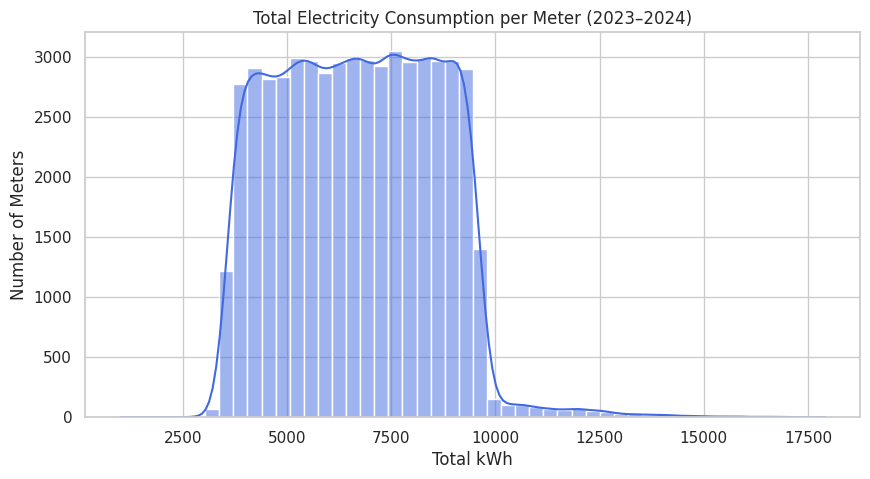

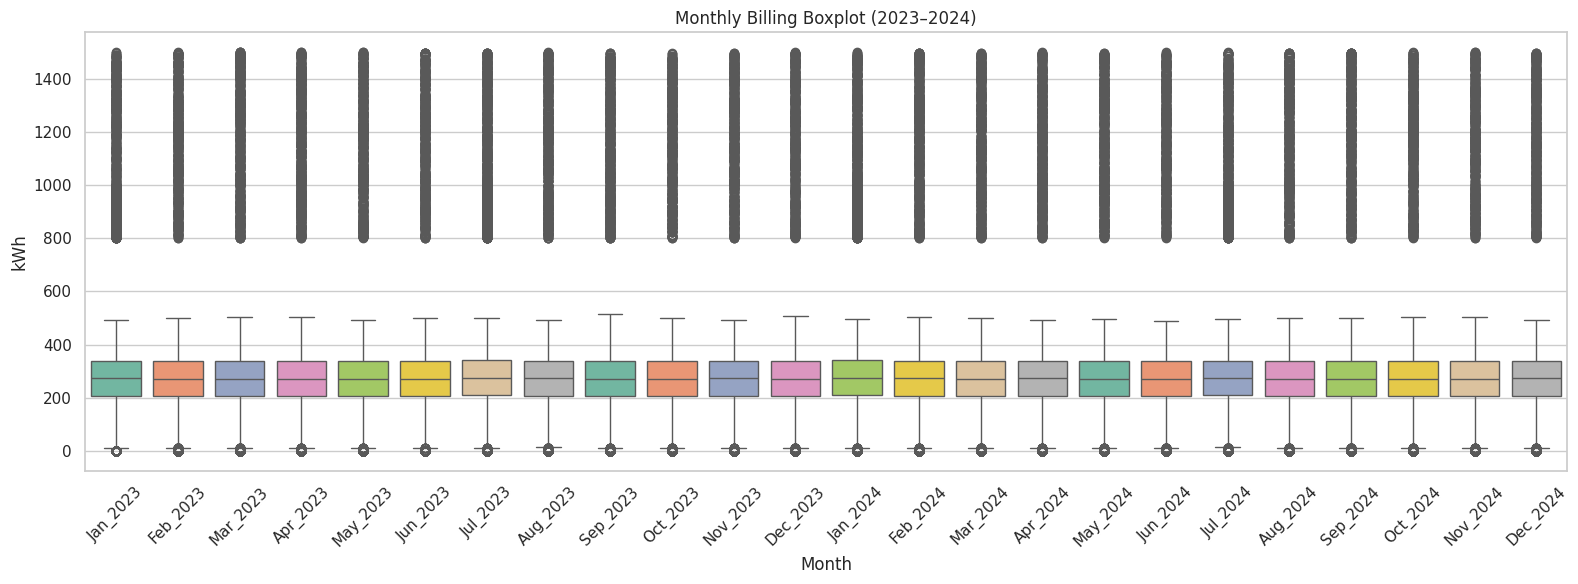

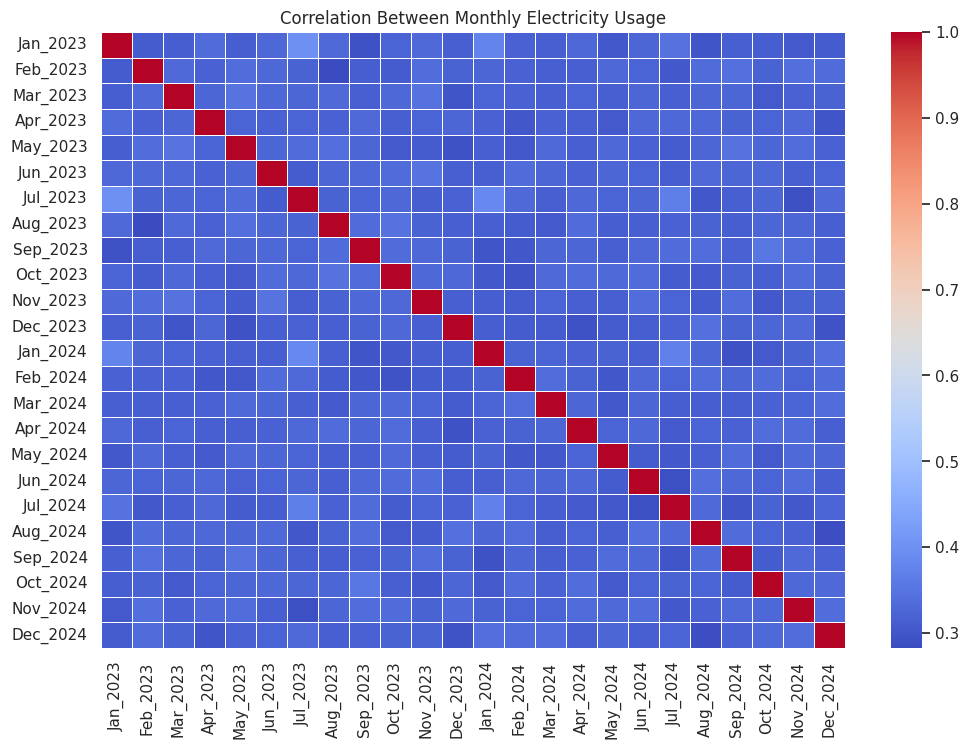

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# 1. Histogram of total consumption per meter over 2 years
df["TotalConsumption"] = df[billing_cols].sum(axis=1)
plt.figure(figsize=(10, 5))
sns.histplot(df["TotalConsumption"], bins=50, kde=True, color="royalblue")
plt.title("Total Electricity Consumption per Meter (2023–2024)")
plt.xlabel("Total kWh")
plt.ylabel("Number of Meters")
plt.show()

# 2. Boxplot to detect outliers month-by-month
plt.figure(figsize=(16, 6))
sns.boxplot(data=df[billing_cols], palette="Set2")
plt.xticks(rotation=45)
plt.title("Monthly Billing Boxplot (2023–2024)")
plt.ylabel("kWh")
plt.xlabel("Month")
plt.tight_layout()
plt.show()

# 3. Correlation heatmap (to see how months relate)
plt.figure(figsize=(12, 8))
corr = df[billing_cols].corr()
sns.heatmap(corr, annot=False, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Between Monthly Electricity Usage")
plt.show()


In [ ]:
#Normalisation
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler()

# Fit and transform the billing data
billing_normalized = scaler.fit_transform(df[billing_cols])

# Convert back to DataFrame for readability
billing_normalized_df = pd.DataFrame(billing_normalized, columns=billing_cols)

# Replace the original billing values in the main dataframe
df[billing_cols] = billing_normalized_df


In [ ]:
# 1. Mean consumption over 24 months
df['MeanUsage'] = df[billing_cols].mean(axis=1)

# 2. Standard deviation (consistency of use)
df['StdUsage'] = df[billing_cols].std(axis=1)

# 3. Number of months with zero usage
df['ZeroMonths'] = (df[billing_cols] == 0).sum(axis=1)

# 4. Peak usage month (maximum)
df['PeakUsage'] = df[billing_cols].max(axis=1)

# 5. Usage range (max - min)
df['UsageRange'] = df[billing_cols].max(axis=1) - df[billing_cols].min(axis=1)

# 6. Theft label — 1 if Type column is not empty, 0 if empty
df['TheftFlag'] = df['Type'].fillna('').apply(lambda x: 0 if x.strip() == '' else 1)
